In [1]:
import csv
from PreProcessing import preprocess_text
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [20]:
mails = []
labels = []
# Open the CSV file
with open('spam_emails_dataset.csv', 'r', encoding='ISO-8859-1') as file:
    # Create a CSV reader object
    csv_reader = csv.reader(file)
    
    # Iterate over each row in the CSV file
    for row in csv_reader:
        # Each row is a list of values
        mails.append(row[1])
        labels.append(row[0])

    del mails[0]
    del labels[0]

In [27]:
# Preprocess the reviews
cleaned_mails = preprocess_text(mails)

In [31]:
# Concatenate the list of reviews into a single string
all_mails = [' '.join(word) for word in cleaned_mails]

# TF-IDF feature extraction
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(all_mails)

y = []
for label in labels:
    if label == 'spam':
        y.append(1)
    else:
        y.append(0)

In [32]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True)

In [33]:
def eval_model(classifier, model_name):
    # Evaluate the model
    predictions = classifier.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, predictions)

    # Print the accuracy of the model
    print(model_name, " Test Accuracy:", accuracy * 100, "%")

    # Calculate Precision, Recall, F1 Score
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    # Print Precision, Recall, F1 Score
    print(model_name, " Precision:", precision * 100, "%")
    print(model_name, " Recall:", recall * 100, "%")
    print(model_name, " F1 Score:", f1 * 100, "%")
    return accuracy, precision, recall, f1

In [34]:
# Train Logistic Regression
lr_classifier = LogisticRegression(random_state=42, C=100, max_iter=100, solver='newton-cg')
lr_classifier.fit(X_train, y_train)

# Evaluate Logistic Regression
lr_accuracy, lr_precision, lr_recall, lr_f1 = eval_model(lr_classifier, "Logistic Regression")

Logistic Regression  Test Accuracy: 97.4156496769562 %
Logistic Regression  Precision: 97.54601226993866 %
Logistic Regression  Recall: 83.24607329842932 %
Logistic Regression  F1 Score: 89.83050847457628 %


In [35]:
# Train Support Vector Machine
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

# Evaluate Support Vector Machine
svm_accuracy, svm_precision, svm_recall, svm_f1 = eval_model(svm_classifier, "Support Vector Machine")

Support Vector Machine  Test Accuracy: 97.77458722182341 %
Support Vector Machine  Precision: 98.78048780487805 %
Support Vector Machine  Recall: 84.81675392670157 %
Support Vector Machine  F1 Score: 91.26760563380283 %


In [36]:
# Train Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Evaluate Naive Bayes
nb_accuracy, nb_precision, nb_recall, nb_f1 = eval_model(nb_classifier, "Naive Bayes")

Naive Bayes  Test Accuracy: 95.97989949748744 %
Naive Bayes  Precision: 100.0 %
Naive Bayes  Recall: 70.68062827225131 %
Naive Bayes  F1 Score: 82.82208588957054 %


In [37]:
# Train Random Forest
rf_classifier = RandomForestClassifier(n_estimators=300, max_depth= 30, min_samples_leaf= 2, random_state=42)
rf_classifier.fit(X_train, y_train)

# Evaluate Random Forest
rf_accuracy, rf_precision, rf_recall, rf_f1 = eval_model(rf_classifier, "Random Forest")

Random Forest  Test Accuracy: 95.11844938980617 %
Random Forest  Precision: 100.0 %
Random Forest  Recall: 64.3979057591623 %
Random Forest  F1 Score: 78.343949044586 %


In [38]:
# Define lists to store performance metrics for each model
models = ['Logistic Regression', 'SVM', 'Naive Bayes', 'Random Forest']
accuracies = [lr_accuracy, svm_accuracy, nb_accuracy, rf_accuracy]
precisions = [lr_precision, svm_precision, nb_precision, rf_precision]
recalls = [lr_recall, svm_recall, nb_recall, rf_recall]
f1_scores = [lr_f1, svm_f1, nb_f1, rf_f1]

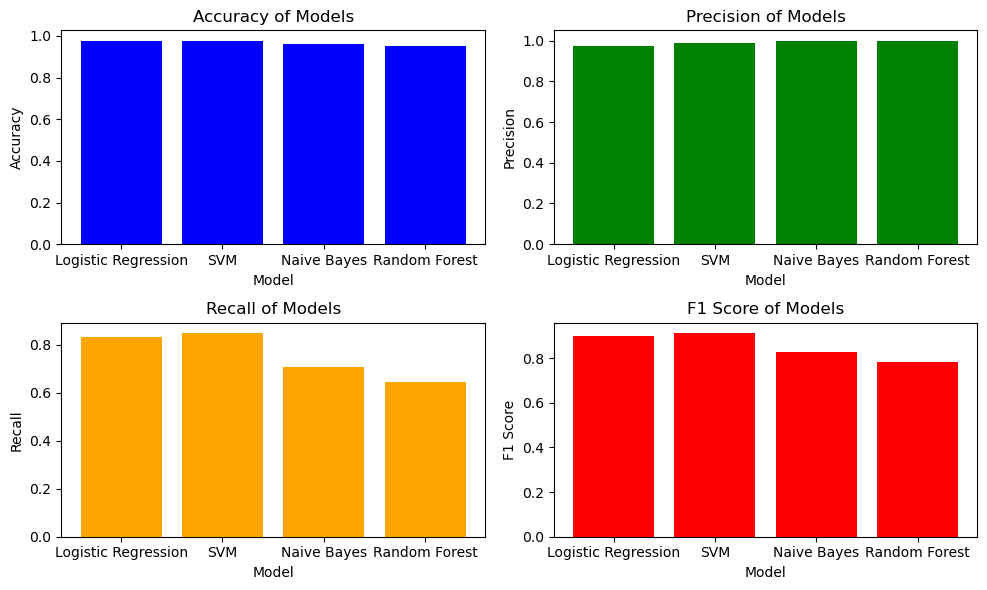

In [39]:
# Plot performance metrics for each model
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.bar(models, accuracies, color='blue')
plt.title('Accuracy of Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')

plt.subplot(2, 2, 2)
plt.bar(models, precisions, color='green')
plt.title('Precision of Models')
plt.xlabel('Model')
plt.ylabel('Precision')

plt.subplot(2, 2, 3)
plt.bar(models, recalls, color='orange')
plt.title('Recall of Models')
plt.xlabel('Model')
plt.ylabel('Recall')

plt.subplot(2, 2, 4)
plt.bar(models, f1_scores, color='red')
plt.title('F1 Score of Models')
plt.xlabel('Model')
plt.ylabel('F1 Score')

plt.tight_layout()
plt.show()